In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-recsys/sample_submission.csv
/kaggle/input/test-recsys/tab_6_city.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-03-21.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-02-20.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-03-01.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-01-11.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-01-01.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-02-10.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-01-21.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-03-31.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-01-31.csv
/kaggle/input/test-recsys/sbermarket_tab_2_1/tab_2_products_2020-03-11.csv
/kaggle/input/test-recsys/sbermarket_tab_2_2/tab_2_products_2020-04-20.csv
/kaggle/input/test-recsys/sbermarket_tab_2_2/tab_2_products_2020-04-10.csv
/kaggle/inp

In [11]:
user_profiles = pd.read_csv("/kaggle/input/test-recsys/kaggle_tab_1345/tab_4_user_profiles.csv")
user_profiles.count()

user_id    438867
gender     207130
bdate      206987
dtype: int64

In [171]:
import glob

path = r'../input/test-recsys/sbermarket_tab_2_1' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=['user_id','price','quantity'])
    df['price'] = df['price']*df['quantity']
    df = df[["user_id", "price", 'quantity']].groupby(["user_id"], as_index=False).sum()
    df['purch_date'] = filename[-14:-4]
    li.append(df)

frame1 = pd.concat(li, axis=0, ignore_index=True)

path = r'../input/test-recsys/sbermarket_tab_2_2' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=['user_id','price','quantity'])
    df['price'] = df['price']*df['quantity']
    df = df[["user_id", "price", 'quantity']].groupby(["user_id"], as_index=False).sum()
    df['purch_date'] = filename[-14:-4]
    li.append(df)

frame2 = pd.concat(li, axis=0, ignore_index=True)

path = r'../input/test-recsys/sbermarket_tab_2_3' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=['user_id','price','quantity'])
    df['price'] = df['price']*df['quantity']
    df = df[["user_id", "price", 'quantity']].groupby(["user_id"], as_index=False).sum()
    df['purch_date'] = filename[-14:-4]
    li.append(df)

frame3 = pd.concat(li, axis=0, ignore_index=True)

In [172]:
frame=pd.concat([frame1,frame2,frame3], axis=0, ignore_index=True)

In [173]:
frame['purch_date'] = pd.to_datetime(frame['purch_date'], errors='coerce') 
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797436 entries, 0 to 797435
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     797436 non-null  int64         
 1   price       797436 non-null  float64       
 2   quantity    797436 non-null  int64         
 3   purch_date  797436 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 24.3 MB


In [170]:
order_price = products[["user_id", "price"]].groupby(["user_id"], as_index=False).sum()

,user_id,price
0,51,8251.840023
1,65,4158.690018
2,260,4380.530014
3,336,5702.569965
4,623,10228.779945
...,...,...
71373,1692496,1229.000000
71374,1692514,14060.200003
71375,1692535,5529.459998
71376,1692562,6471.329967


In [141]:
merged_price_user = order_price.merge(user_profiles, left_on='user_id', right_on='user_id');

In [142]:
merged_price_user.count()

user_id    5067
price      5067
gender     2288
bdate      2282
dtype: int64

In [209]:
products

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,51,8689892,75751545,64.900002,1,5.0,Бананы,709,Без бренда,91.0,90
1,51,8689892,75751546,298.890015,1,0.0,Манго,3817538,Без бренда,91.0,90
2,51,8689892,75751547,139.000000,1,0.0,Помидоры,55133,Без бренда,85.0,84
3,51,8689892,75751548,2599.000000,1,0.0,Икра красная лососевая Красное Золото зерниста...,5501,Красное Золото,113.0,112
4,51,8689892,75751972,174.000000,2,0.0,Гель-шампунь Le Petit Marseillais Кедр и минер...,25198,Le Petit Marseillais,192.0,191
...,...,...,...,...,...,...,...,...,...,...,...
2936459,1692574,9096506,78223084,65.989998,1,0.0,Чипсы высокобелковые Racionika с луком и укроп...,3559099,Racionika,610.0,19
2936460,1692574,9096506,78240927,112.000000,2,22.1,"Творог Valio обезжиренный 0,1% 200 г бзмж",4033643,Valio,30.0,20
2936461,1692574,9096506,78241112,230.000000,1,0.0,Яйцо куриное Красногорка C0 30 шт,9936,Красногорка,34.0,20
2936462,1692574,9096506,78241983,246.000000,1,0.0,Яйцо куриное Окское С0 30 шт,45459,Окское,34.0,20


In [143]:
merged_price_user_drop = merged_price_user.dropna()
merged_price_user_drop

,user_id,price,gender,bdate
0,65,4158.690018,male,1989-01-10
6,11776,18231.639938,female,1.8.1990
10,20235,19124.389957,female,21.08.1986
13,24450,9233.149995,female,14.9.1961
14,25358,5024.319984,female,1975-06-30
...,...,...,...,...
5057,1689865,1668.479992,female,1995-06-05
5058,1690168,3942.999994,female,1983-10-26
5059,1690212,1782.269981,female,1998-10-13
5061,1691201,1048.629990,male,1990-12-01


In [144]:
merged_price_user_drop_female = merged_price_user_drop[merged_price_user_drop["gender"] == "female"]
merged_price_user_drop_male = merged_price_user_drop[merged_price_user_drop["gender"] == "male"]

In [145]:
merged_price_user_drop_female.shape

(1350, 4)

In [146]:
merged_price_user_drop['bdate'] = pd.to_datetime(merged_price_user_drop['bdate'], errors='coerce') 
merged_price_user_drop['month'] = merged_price_user_drop["bdate"].dt.month
merged_price_user_drop['year'] = merged_price_user_drop["bdate"].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [147]:
merged_price_user_drop

,user_id,price,gender,bdate,month,year
0,65,4158.690018,male,1989-01-10,1.0,1989.0
6,11776,18231.639938,female,1990-01-08,1.0,1990.0
10,20235,19124.389957,female,1986-08-21,8.0,1986.0
13,24450,9233.149995,female,1961-09-14,9.0,1961.0
14,25358,5024.319984,female,1975-06-30,6.0,1975.0
...,...,...,...,...,...,...
5057,1689865,1668.479992,female,1995-06-05,6.0,1995.0
5058,1690168,3942.999994,female,1983-10-26,10.0,1983.0
5059,1690212,1782.269981,female,1998-10-13,10.0,1998.0
5061,1691201,1048.629990,male,1990-12-01,12.0,1990.0


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

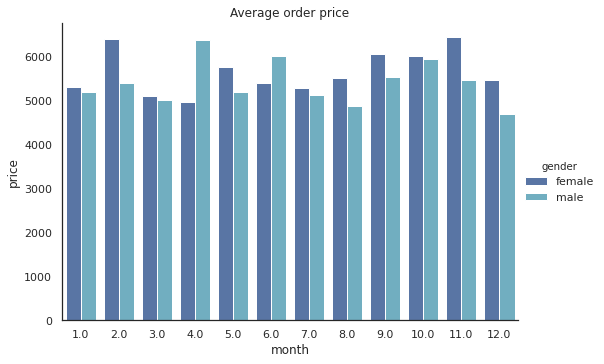

In [149]:
grouped_merged_price_user_drop = merged_price_user_drop[['gender', 
                                                  'month', 
                                                  'price']].groupby(by=['gender', 
                                                                        'month'], as_index=False).mean()

g = sns.catplot(x='month'
                   ,y= 'price'
                   ,hue='gender'
                   ,data=grouped_merged_price_user_drop
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )
#g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average order price')
plt.savefig('AV_order_price.png', transparent=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


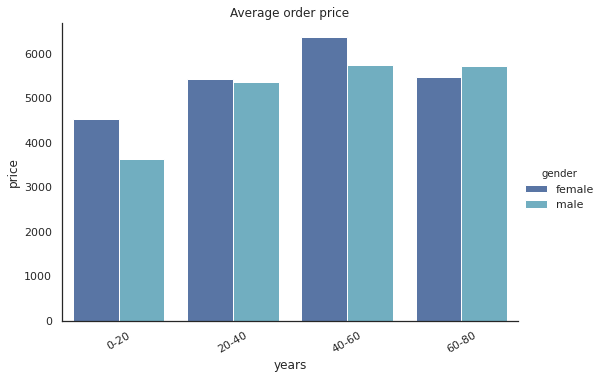

In [150]:
merged_price_user_drop['years'] = (2020 - merged_price_user_drop['year']) // 20
merged_price_user_drop = merged_price_user_drop[merged_price_user_drop.select_dtypes(include=[np.number]).ge(0).all(1)]
merged_price_user_drop = merged_price_user_drop[merged_price_user_drop['years'] < 4]
merged_price_user_drop = merged_price_user_drop[merged_price_user_drop['years'] >= 0]


grouped_year_merged_price_user_drop = merged_price_user_drop[['gender', 
                                                  'years', 
                                                  'price']].groupby(by=['gender', 
                                                                        'years'], as_index=False).mean()

g = sns.catplot(x='years'
                   ,y= 'price'
                   ,hue='gender'
                   ,data=grouped_year_merged_price_user_drop
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )

g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average order price')
plt.savefig('AV_order_price_year.png', transparent=True)
plt.show()

In [137]:
from IPython.display import FileLink
FileLink(r'AV_order_price_year.png')

/kaggle/working/AV_order_price_year.png

In [180]:
frame = frame.merge(user_profiles, left_on='user_id', right_on='user_id')
frame = frame.dropna()
frame['bdate'] = pd.to_datetime(frame['bdate'], errors='coerce') 
frame['month'] = frame["bdate"].dt.month
frame['year'] = frame["bdate"].dt.year

In [205]:
df_mean_price = frame[["user_id", "purch_date", "price"]].groupby(by=['user_id', 'purch_date'], as_index=False).sum().groupby(["user_id"], as_index=False).mean()
df_mean_price = df_mean_price.merge(user_profiles, left_on='user_id', right_on='user_id')
df_mean_price = df_mean_price.dropna()
df_mean_price['bdate'] = pd.to_datetime(df_mean_price['bdate'], errors='coerce') 
df_mean_price['month'] = df_mean_price["bdate"].dt.month
df_mean_price['year'] = df_mean_price["bdate"].dt.year

In [202]:
df_mean_quantity = frame[["user_id", "purch_date", "quantity"]].groupby(by=['user_id', 'purch_date'], as_index=False).mean().groupby(["user_id"], as_index=False).mean()
df_mean_quantity = df_mean_quantity.merge(user_profiles, left_on='user_id', right_on='user_id')
df_mean_quantity = df_mean_quantity.dropna()
df_mean_quantity['bdate'] = pd.to_datetime(df_mean_quantity['bdate'], errors='coerce') 
df_mean_quantity['month'] = df_mean_quantity["bdate"].dt.month
df_mean_quantity['year'] = df_mean_quantity["bdate"].dt.year

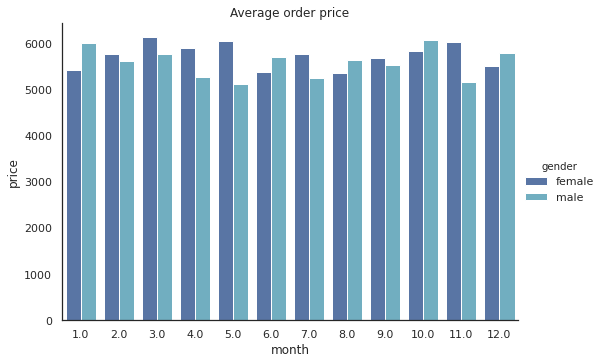

In [190]:
grouped_df_mean_price = df_mean_price[['gender', 
                                        'month', 
                                        'price']].groupby(by=['gender', 
                                                              'month'], as_index=False).mean()

g = sns.catplot(x='month'
                   ,y= 'price'
                   ,hue='gender'
                   ,data=grouped_df_mean_price
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )
#g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average order price')
plt.savefig('AV_order_price_all.png', transparent=True)
plt.show()

In [191]:
from IPython.display import FileLink
FileLink(r'AV_order_price_all.png')

/kaggle/working/AV_order_price_all.png

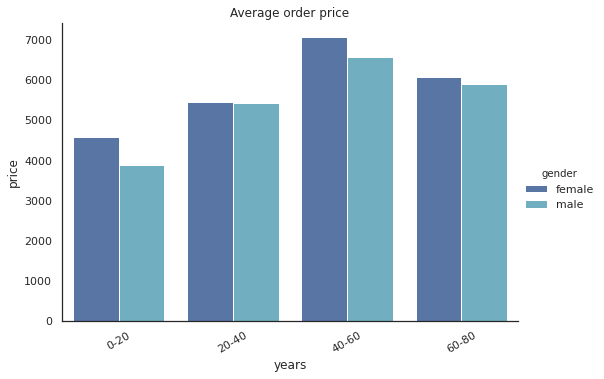

In [193]:
df_mean_price['years'] = (2020 - df_mean_price['year']) // 20
df_mean_price = df_mean_price[df_mean_price.select_dtypes(include=[np.number]).ge(0).all(1)]
df_mean_price = df_mean_price[df_mean_price['years'] < 4]
df_mean_price = df_mean_price[df_mean_price['years'] >= 0]


grouped_df_mean_price = df_mean_price[['gender', 
                                                  'years', 
                                                  'price']].groupby(by=['gender', 
                                                                        'years'], as_index=False).mean()

g = sns.catplot(x='years'
                   ,y= 'price'
                   ,hue='gender'
                   ,data=grouped_df_mean_price
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )

g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average order price')
plt.savefig('AV_order_price_year_all.png', transparent=True)
plt.show()

In [195]:
from IPython.display import FileLink
FileLink(r'AV_order_price_year_all.png')

/kaggle/working/AV_order_price_year_all.png

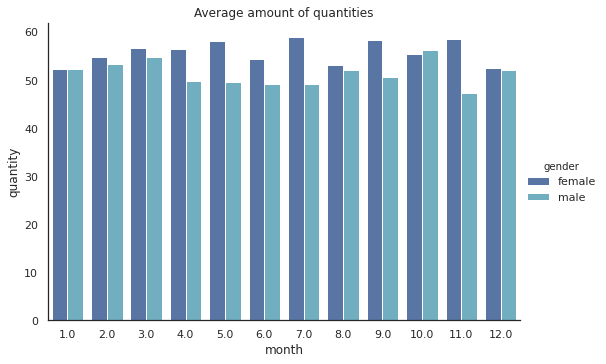

In [206]:
grouped_df_mean_quantity = df_mean_quantity[['gender', 
                                        'month', 
                                        'quantity']].groupby(by=['gender', 
                                                              'month'], as_index=False).mean()

g = sns.catplot(x='month'
                   ,y= 'quantity'
                   ,hue='gender'
                   ,data=grouped_df_mean_quantity
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )
#g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average amount of quantities')
plt.savefig('AV_order_quantity_all.png', transparent=True)
plt.show()

In [198]:
from IPython.display import FileLink
FileLink(r'AV_order_quantity_all.png')

/kaggle/working/AV_order_quantity_all.png

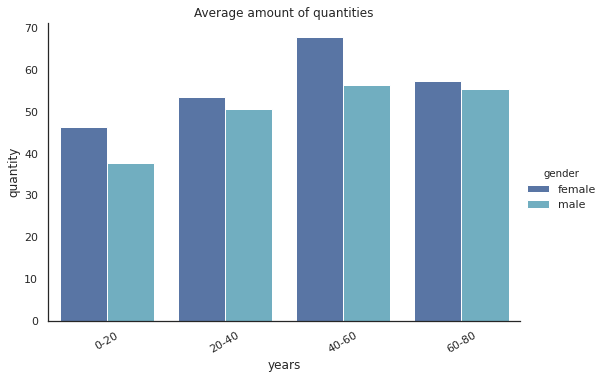

In [207]:
df_mean_quantity['years'] = (2020 - df_mean_quantity['year']) // 20
df_mean_quantity = df_mean_quantity[df_mean_quantity.select_dtypes(include=[np.number]).ge(0).all(1)]
df_mean_quantity = df_mean_quantity[df_mean_quantity['years'] < 4]
df_mean_quantity = df_mean_quantity[df_mean_quantity['years'] >= 0]


grouped_df_mean_quantity = df_mean_quantity[['gender', 
                                                  'years', 
                                                  'quantity']].groupby(by=['gender', 
                                                                        'years'], as_index=False).mean()

g = sns.catplot(x='years'
                   ,y= 'quantity'
                   ,hue='gender'
                   ,data=grouped_df_mean_quantity
                   ,kind='bar'
                   ,aspect=1.5
                   ,palette=['b', 'c']
                   ,
                   )

g.set_xticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'], rotation=30)
plt.title('Average amount of quantities')
plt.savefig('AV_order_quantuty_year_all.png', transparent=True)
plt.show()

In [201]:
from IPython.display import FileLink
FileLink(r'AV_order_quantuty_year_all.png')

/kaggle/working/AV_order_quantuty_year_all.png